# Formatting and Analysis
# =====================

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sktime

%matplotlib inline

In [3]:
data = pd.read_csv('/home/zone/Documents/advantage-investing/data/raw/Goog.csv')

In [4]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,07/19/2021,"2,623.11","2,624.94","2,570.74","2,585.08","1,285,466"
1,1,07/16/2021,"2,632.82","2,643.66","2,616.43","2,636.91","743,059"
2,2,07/15/2021,"2,650.00","2,651.90","2,611.96","2,625.33","829,316"
3,3,07/14/2021,"2,638.03","2,659.92","2,637.96","2,641.65","895,927"
4,4,07/13/2021,"2,617.63","2,640.84","2,612.74","2,619.89","830,898"
...,...,...,...,...,...,...,...
247,247,07/24/2020,"1,498.93","1,517.64","1,488.40","1,511.87","1,544,404"
248,248,07/23/2020,"1,566.97","1,571.87","1,507.39","1,515.68","1,627,634"
249,249,07/22/2020,"1,560.50","1,570.00","1,546.10","1,568.49","931,985"
250,250,07/21/2020,"1,586.99","1,586.99","1,554.28","1,558.42","1,218,645"


In [52]:
data.dtypes

Unnamed: 0     int64
Date          object
Open          object
High          object
Low           object
Close         object
Volume        object
dtype: object

In [55]:
data.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [63]:
data[:][:1]

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,07/19/2021,"2,623.11","2,624.94","2,570.74","2,585.08","1,285,466"


In [64]:
for col in data.drop(columns=['Unnamed: 0']):
    if str(col) !=['Unnamed: 0']:
        print(str(col))
        data[col] = data[col].str.split('.').str[0]

Date
Open
High
Low
Close
Volume


In [70]:
for col in data.drop(columns=['Unnamed: 0']):
    print(str(col))
    data[col] = data[col].str.strip(',')

Date
Open
High
Low
Close
Volume


In [123]:
df.Close

Date
2021-07-19    2585
2021-07-16    2636
2021-07-15    2625
2021-07-14    2641
2021-07-13    2619
              ... 
2020-07-24    1511
2020-07-23    1515
2020-07-22    1568
2020-07-21    1558
2020-07-20    1565
Name: Close, Length: 252, dtype: int64

In [131]:
df = data.replace(',','', regex=True)

In [132]:
df.Date = pd.to_datetime(df.Date)
df.Close = pd.to_numeric(df.Close)
df = df.set_index(df.Date,drop = True)
df = pd.DataFrame(df.Close)

In [133]:
df

,Close
Date,
2021-07-19,2585
2021-07-16,2636
2021-07-15,2625
2021-07-14,2641
2021-07-13,2619
...,...
2020-07-24,1511
2020-07-23,1515
2020-07-22,1568


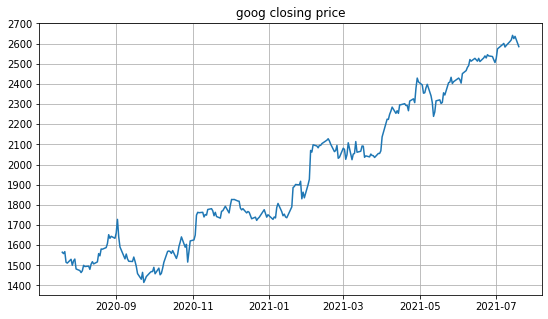

In [134]:
plt.figure(figsize=(9,5))
plt.grid(True)
plt.xlabel('')
plt.ylabel('')

plt.yticks(np.arange(0, 3000, 100))
plt.plot(df['Close'])
plt.title('goog closing price')
plt.show()

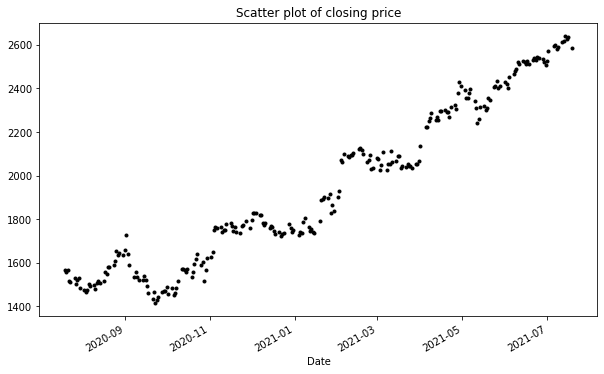

In [135]:
plt.figure(figsize=(10,6))
df_close = df.Close
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

###  Is the data stationary? Data points are often non-stationary or have means, variances, and covariances that change over time.
### Non-stationary behaviors like trends are unpredictable and produce unreliable forecasts

In [138]:
from statsmodels.tsa.stattools import adfuller

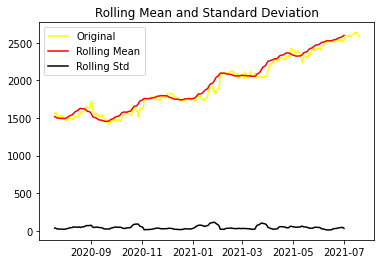

Results of dickey fuller test
Test Statistics                 -1.647320
p-value                          0.458438
No. of lags used                 5.000000
Number of observations used    246.000000
critical value (1%)             -3.457215
critical value (5%)             -2.873362
critical value (10%)            -2.573070
dtype: float64


In [139]:

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df.Close)

### The mean and std  changes over time so our data is non stationary and looking at the graph the data is showing a trend.
### First we'll create train and test sets then we'll fit an ARIMA model to this data. ( ARIMA models use differencing to extract stationary data  from our originally non stationary data)


In [154]:
df_log = df_log[::-1]

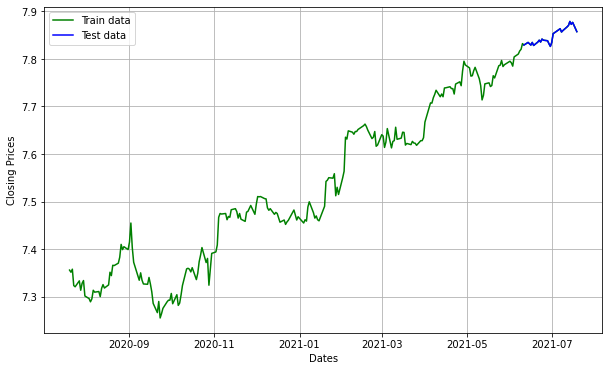

In [155]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [159]:
len(test_data)

26

In [ ]:
!pip install kats

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.3 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 815 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 509 kB/s eta 0:00:01
     |████████████████████████████████| 498 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 16.2 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 831.4 MB 5.4 kB/s eta 0:00:013
     |████████████████████████████████| 475 kB 3.8 MB/s eta 0:00:01
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286608 sha256=3ed45ffb7f5c387ce032485fa365c36636067117947c4c428c2ac1936cbea1df
  Stored in directory: /home/zone/.cache/pip/wheels/c6/5c/04/73fe3ba5271769880191516041d8878e843c80453adf8d43d0
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-lzdnocew/fbprophet_e8d916545e9

In [1]:
!pip install arrow


Defaulting to user installation because normal site-packages is not writeable
